# Analysis 2: Tate Bond

## Research question/interests
### How much has three point volume increased over time in the NBA, and has three-point percentage increased the same amount?
I will analyze and quantify the rise of three-point shooting in the NBA. This will include analysis of a potential increase in three point percentage, in addition to the increase in volume. In addition, we could look at how recent champions have shot the three. We could also compare the increases in three point shooting by position. We could also look at how offensive rebounding has changed over time, since three point shots tend to result in longer rebounds, and potentially fewer offensive rebounds. We can compare the data by year or by decade, to see how shooting has changed, especially in the 2010s. In addition, I will explore the evolution of the three-point shot and how its role in the game of basketball has changed substantially. The three-point has dramatically impacted how teams play the game, and I want to quantify that through my research.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set preferences for plots
sns.set_theme(style="ticks", font_scale=1.3)
sns.set_style('white')
sns.set_context('talk')
plt.rc("axes.spines", top=False, right=False)

In [3]:
import scripts
from scripts import project_functions2 as pf

In [4]:
df = pf.load_and_process_team_totals('../data/raw/Team Totals.csv')
df1 = pf.load_and_process_per_game('../data/raw/Player Per Game.csv')

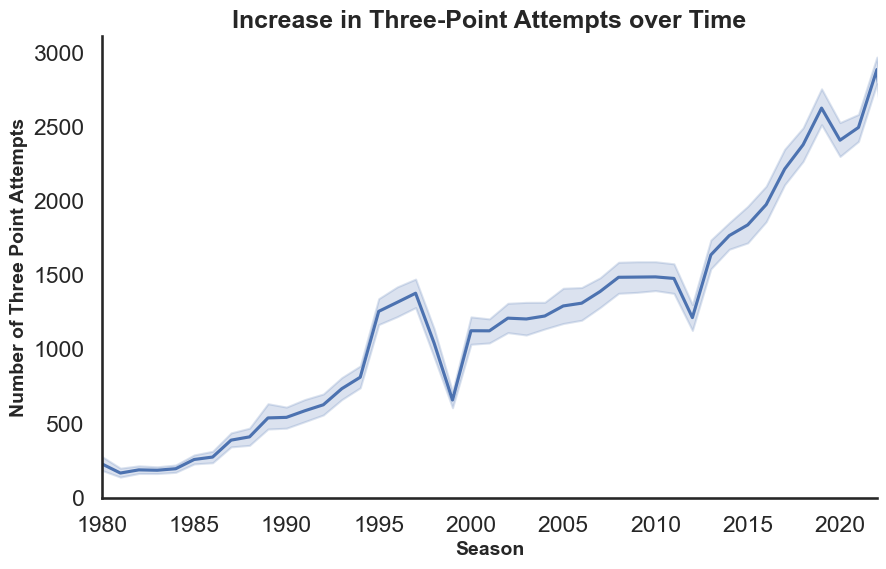

In [5]:
# Set plot size
plt.figure(figsize=(10,6))

# Create line plot
graph1 = sns.lineplot(x=df['season'], y=df["three_point_attempts"])

# Set plot title and axis labels
plt.title("Increase in Three-Point Attempts over Time", fontsize=18, fontweight='bold')
plt.xlabel("Season", fontsize=14, fontweight='bold')
plt.ylabel("Number of Three Point Attempts", fontsize=14, fontweight='bold')

# Set x-axis limits
graph1.set_xlim(1980, 2022)

# Show plot
plt.show()

The graph shows that the number of three-point attempts in the NBA has increased steadily over time, with a sharp increase since the early 2010s. In 1980, there were only around 250 three-point attempts, while in recent seasons, the number has approached 3000. The only notable decreases in three-point attempts over this period have been in shortened seasons, such as the lockout and pandemic shortened seasons. The sharp increase in three-point attempts over the last decade represents a significant shift in basketball due to the rise of skilled shooters like Stephen Curry, changing offensive strategies, and the increasing prevalence of advanced statistics.

In [2]:
# Save plot as PNG
plt.savefig('three_point_attempts.png')

<Figure size 640x480 with 0 Axes>

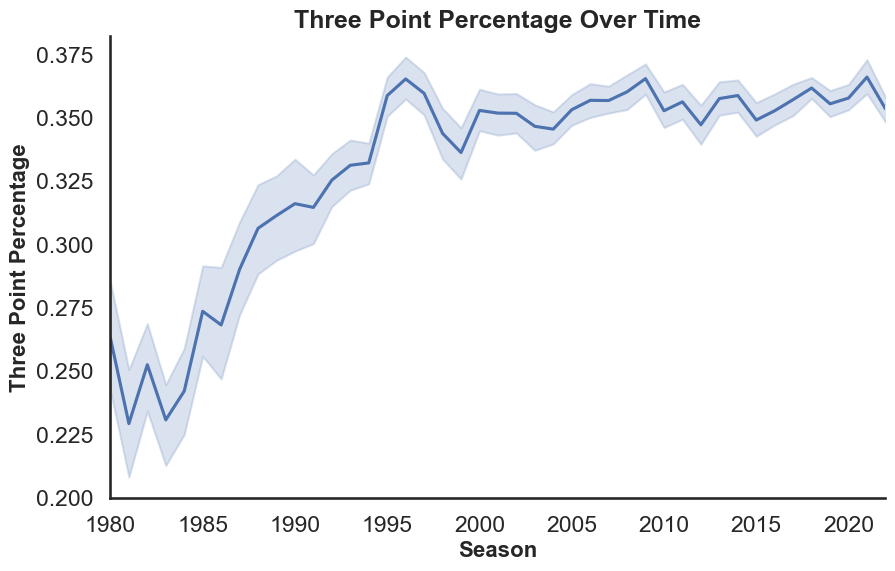

In [6]:
# Set plot size
plt.figure(figsize=(10,6))

# Create line plot
graph2 = sns.lineplot(x=df['season'], y=df["three_point_percentage"])

# Set plot title and axis labels
plt.title("Three Point Percentage Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Season", fontsize=16, fontweight='bold')
plt.ylabel("Three Point Percentage", fontsize=16, fontweight='bold')

# Set x-axis limits
graph2.set_xlim(1980, 2022)

# Show plot
plt.show()

The second graph shows the three-point percentage over time in the NBA. It shows that the three-point percentage increased rapidly when the NBA first introduced the shot, going from around 26% in 1980 to 36% in the late 1990s. However, in the last 20 years, the three-point percentage has remained at about 35% with some fluctuations. This percentage stagnation suggests a limit to what basketball players can shoot from the three-point range, around 35 percent. However, since three-point attempts have increased so much, we can conclude that players are scoring more three-pointers than ever and are better shooters.

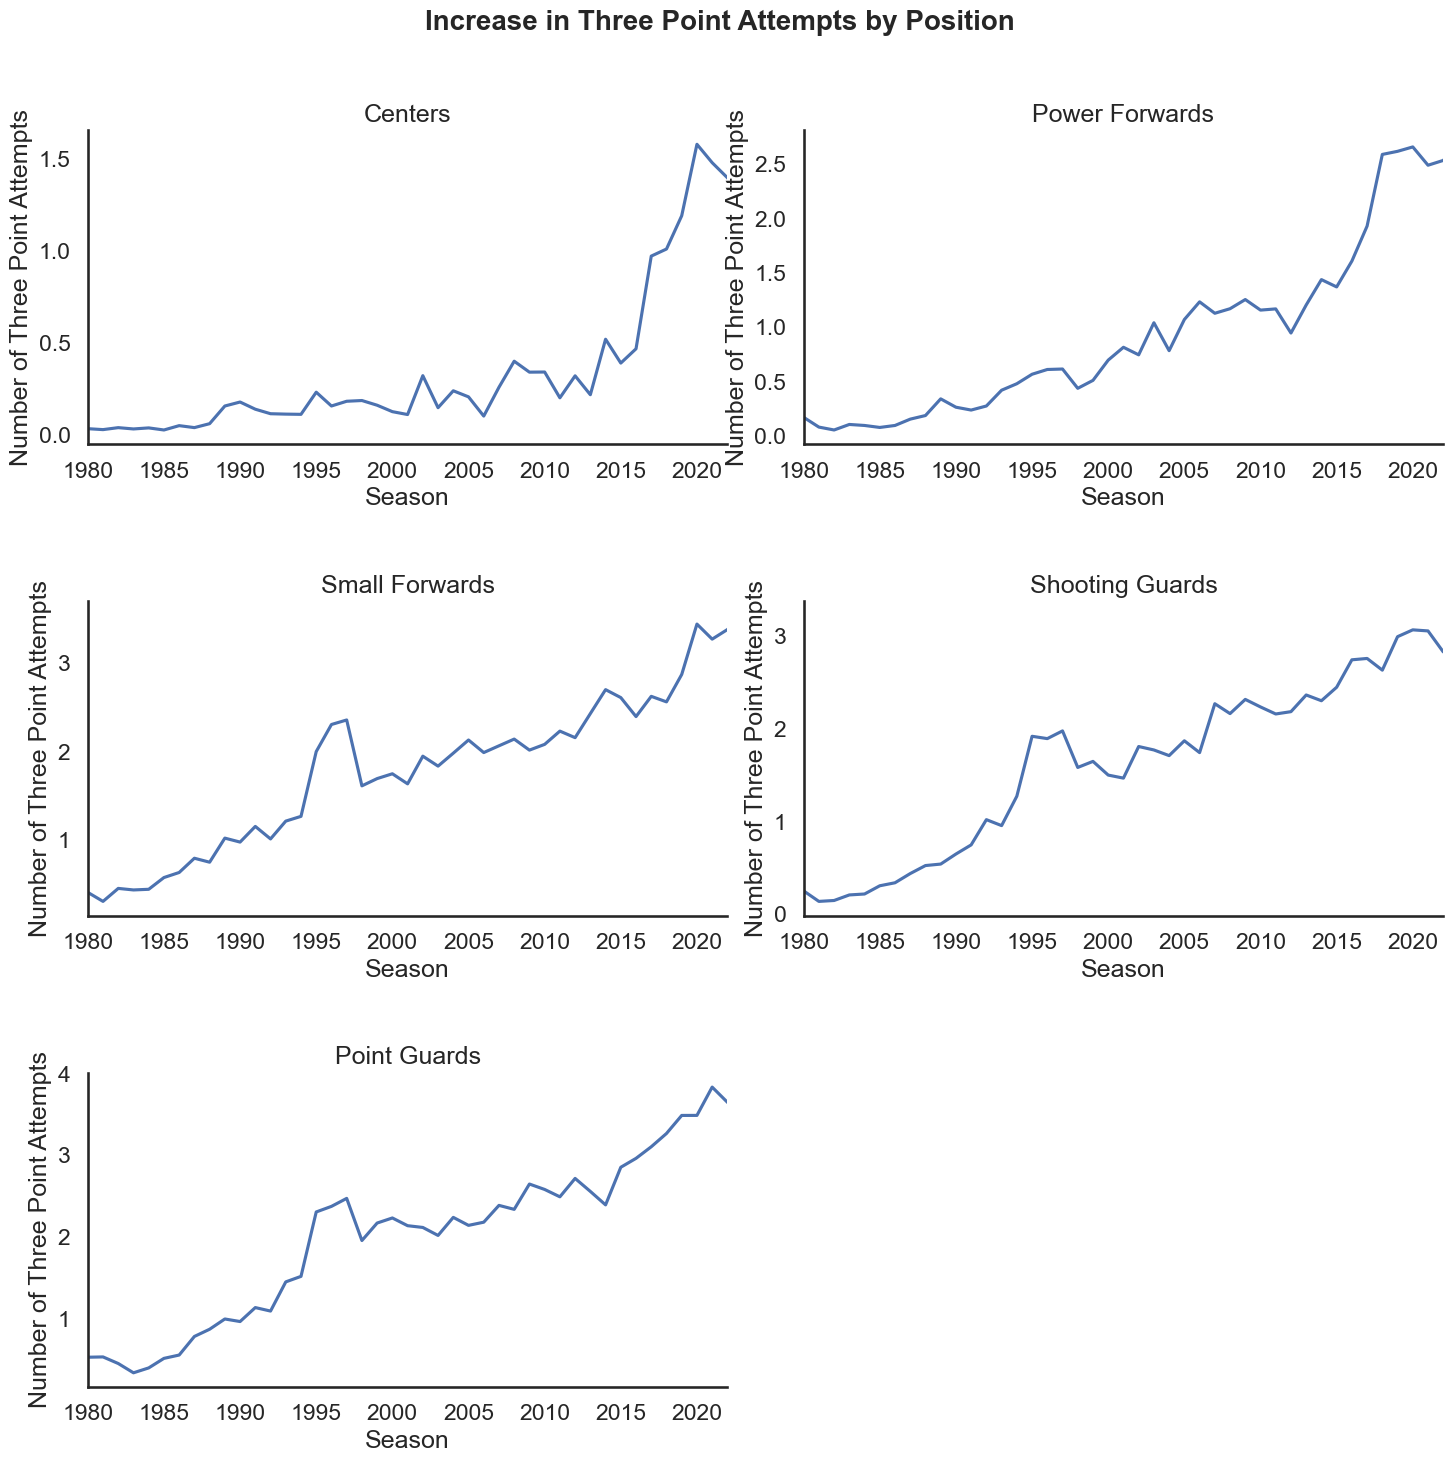

In [25]:
# Set the titles for each subplot in reverse order
titles = ['Point Guards', 'Shooting Guards', 'Small Forwards', 'Power Forwards', 'Centers'][::-1]

# Create a pivot table
pivot_table = df1.pivot_table(values='three_point_attempts_per_game', index='season', columns='position')

# Reset the index to make season a column
pivot_table = pivot_table.reset_index()

# Melt the pivot table to create a long-form dataframe
melted_table = pd.melt(pivot_table, id_vars='season', var_name='position', value_name='attempts')

# Create a FacetGrid
grid1 = sns.FacetGrid(data=melted_table, col='position', height=5, aspect=1.5, col_wrap=2, sharex=False, sharey=False)

# Map a lineplot to the FacetGrid
grid1.map(sns.lineplot, 'season', 'attempts')

# Set titles, xlabels, and ylabels for each subplot
for ax, title in zip(grid1.axes.flat, titles):
    ax.set_title(title)
    ax.set(xlabel='Season', ylabel='Number of Three Point Attempts', xlim=(1980,2022))
    
# Set the title for the whole plot
fig1 = plt.gcf()
fig1.suptitle('Increase in Three Point Attempts by Position', fontsize=20, fontweight='bold')

# Adjust the subplot parameters
plt.subplots_adjust(top=0.9, hspace=0.5)

# Show the plot
plt.show()


The plot shows the number of three-point attempts per game by position over time. The plot shows a significant increase in three-point attempts over time. Point guards, shooting guards, and small forwards have increased at a steady pace over time. Attempts for power forwards and centers initially stayed very low, but have increased rapidly in the past decade or so. The chnage in the game of basketball over the past decade is most pronounced when looking at these positions. Power forwards have transformed from a second big man to a fourth perimeter player, and centers have begun to spend more time as outside shooters as well.

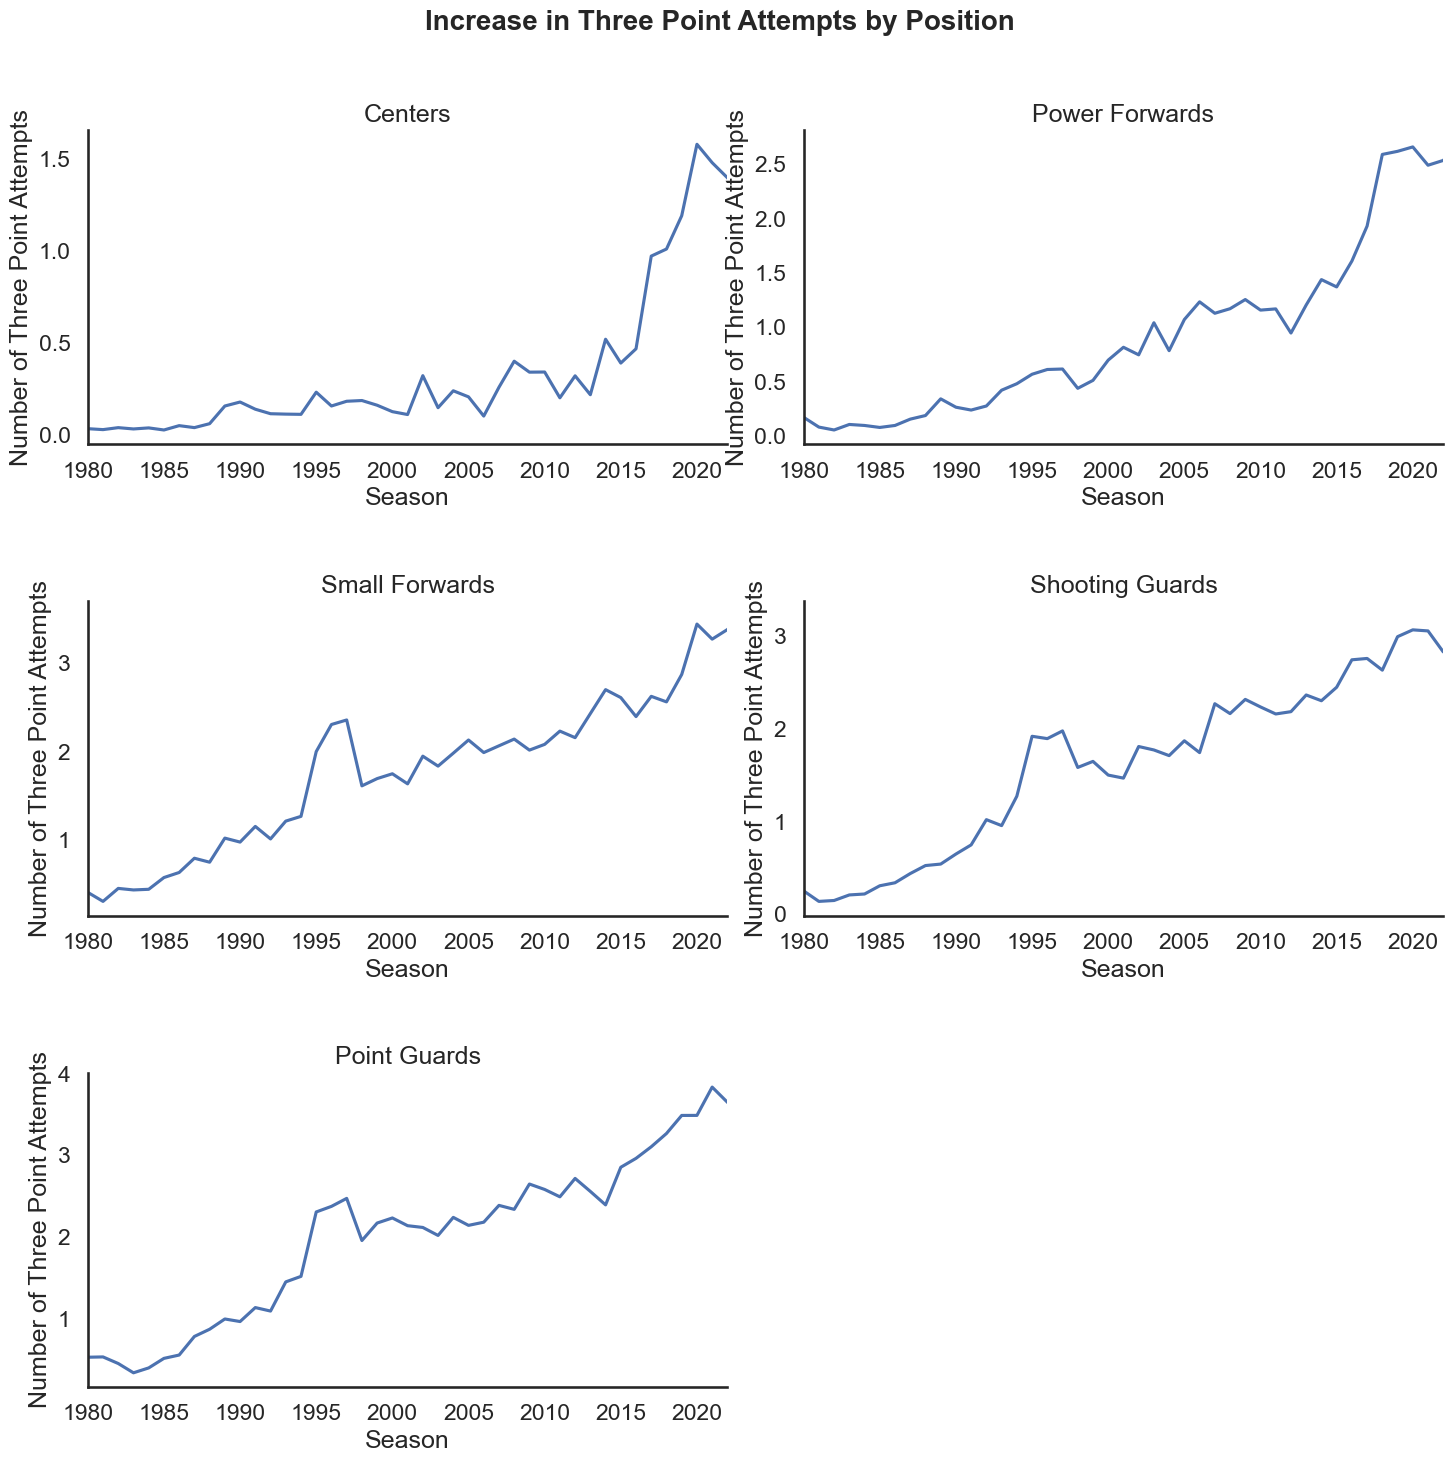

In [26]:
# Create a pivot table
pivot_table = df1.pivot_table(values='three_point_attempts_per_game', index='season', columns='position')

# Reset the index to make season a column
pivot_table = pivot_table.reset_index()

# Melt the pivot table to create a long-form dataframe
melted_table = pd.melt(pivot_table, id_vars='season', var_name='position', value_name='attempts')

# Define the titles for each subplot
titles = ['Point Guards', 'Shooting Guards', 'Small Forwards', 'Power Forwards', 'Centers']

# Create a FacetGrid
grid1 = sns.FacetGrid(data=melted_table, col='position', height=5, aspect=1.5, col_wrap=2, sharex=False, sharey=False)

# Map a lineplot to the FacetGrid
grid1.map(sns.lineplot, 'season', 'attempts')

# Set titles, xlabels, and ylabels for each subplot
for ax, title in zip(grid1.axes.flat, titles[::-1]):
    ax.set_title(title)
    ax.set(xlabel='Season', ylabel='Number of Three Point Attempts', xlim=(1980,2022))
    
# Set the title for the whole plot
fig1 = plt.gcf()
fig1.suptitle('Increase in Three Point Attempts by Position', fontsize=20, fontweight='bold')

# Adjust the subplot parameters
plt.subplots_adjust(top=0.9, hspace=0.5)

# Show the plot
plt.show()


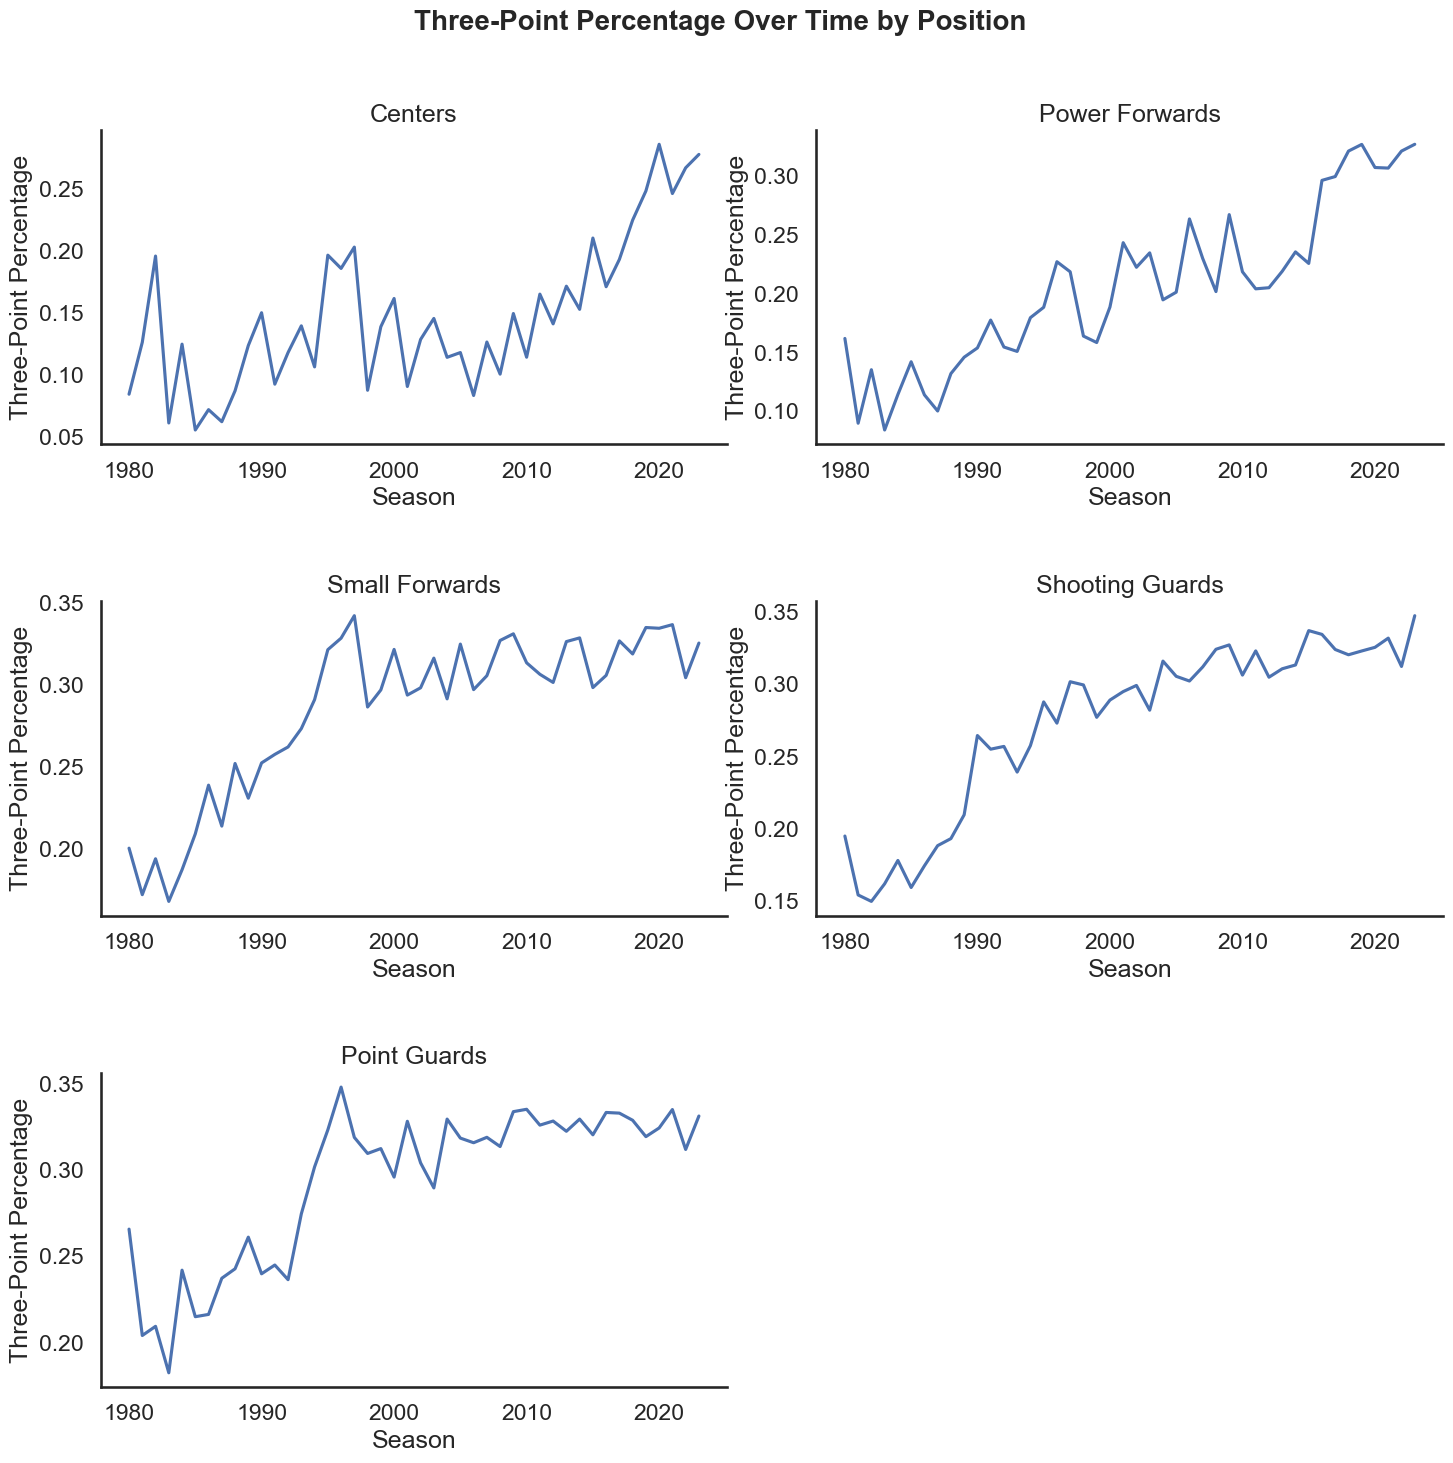

In [29]:
# Create a pivot table with the mean three-point percentage for each season and position
pivot_table = df1.pivot_table(index='season', columns='position', values='three_point_percentage', aggfunc='mean')

# Define the list of titles for each subplot and reverse it
titles = ['Point Guards', 'Shooting Guards', 'Small Forwards', 'Power Forwards', 'Centers'][::-1]

# Create a FacetGrid
grid1 = sns.FacetGrid(data=pivot_table.melt(ignore_index=False).reset_index(), col='position', height=5, aspect=1.5, col_wrap=2, sharex=False, sharey=False)

# Map a lineplot to the FacetGrid
grid1.map(sns.lineplot, 'season', 'value')

# Set titles, xlabels, and ylabels for each subplot
for ax, title in zip(grid1.axes.flat, titles):
    ax.set_title(title)
    ax.set(xlabel='Season', ylabel='Three-Point Percentage')

# Set the title for the whole plot
fig1 = plt.gcf()
fig1.suptitle('Three-Point Percentage Over Time by Position', fontsize=20, fontweight='bold')

# Adjust the subplot parameters
plt.subplots_adjust(top=0.9, hspace=0.5)

# Show the plot
plt.show()


The fourth graph shows that for guards and small forwards, three point percentage increased drastically throughout the 80s and 90s, before levelling off in the low to mid 30s around the year 2000. Power forward three point percentage increased (with numerous large peaks and valleys) consistently over the period, although the increase seems to have levelled off in recent years. Centers actually saw their three point eprcentage dip in the 2000s, but their percentage has increased consistently since 2010.